In [161]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

In [162]:
sp500 = pd.read_csv("sp500.csv", index_col=0)
sp500.index = pd.to_datetime(sp500.index, format="%Y-%m-%d")
sp500.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,0,0
1950-01-04,16.85,16.85,16.85,16.85,1890000,0,0
1950-01-05,16.93,16.93,16.93,16.93,2550000,0,0
1950-01-06,16.98,16.98,16.98,16.98,2010000,0,0
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,0


<Axes: xlabel='Date'>

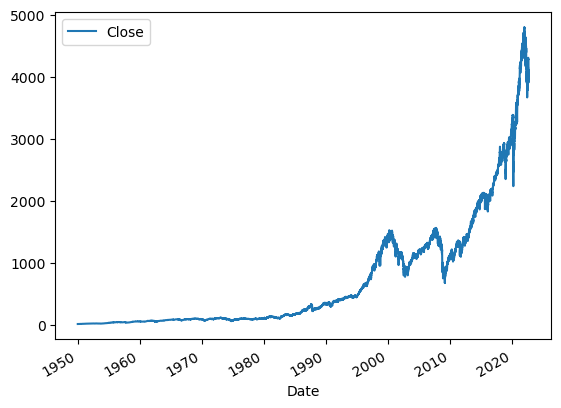

In [163]:
sp500.plot.line(y="Close", use_index=True)

In [164]:
sp500.drop(["Dividends", "Stock Splits"], axis=1, inplace=True)
sp500.head(5)

,Open,High,Low,Close,Volume
Date,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000
1950-01-04,16.85,16.85,16.85,16.85,1890000
1950-01-05,16.93,16.93,16.93,16.93,2550000
1950-01-06,16.98,16.98,16.98,16.98,2010000
1950-01-09,17.08,17.08,17.08,17.08,2520000


In [165]:
sp500['Target'] = (sp500["Close"].shift(-1) > sp500["Close"]).astype(int)
sp500.sample(5)

,Open,High,Low,Close,Volume,Target
Date,,,,,,
2019-12-19,3192.320068,3205.479980,3192.320068,3205.370117,3720450000,1
2012-11-02,1427.589966,1434.270020,1412.910034,1414.199951,3732480000,1
1967-03-03,0.000000,89.000000,87.510002,88.290001,11100000,0
2019-07-05,2984.250000,2994.030029,2967.969971,2990.409912,2434210000,0
1965-07-12,0.000000,86.080002,85.239998,85.690002,3690000,0


In [166]:
sp500['Open'].replace(0, pd.NaT, inplace=True)
sp500['Open'].fillna(sp500['Close'].shift(), inplace=True)

sp500["Open Close Ratio"] = sp500["Close"]/sp500["Open"]
sp500["Close Open Ratio"] = sp500["Close"].shift(1)/sp500["Open"]
sp500["Price Range"] = sp500["High"] - sp500["Low"]
sp500["Price Change"] = sp500["Close"] - sp500["Open"] 
sp500["Daily Returns"] = sp500["Close"].pct_change()
sp500["Volume Change"] = sp500["Volume"].pct_change()
sp500["Volume Weighted Average Price"] = (sp500['Close'] * sp500['Volume']).cumsum() / sp500['Volume'].cumsum()


sp500.head(5)

,Open,High,Low,Close,Volume,Target,Open Close Ratio,Close Open Ratio,Price Range,Price Change,Daily Returns,Volume Change,Volume Weighted Average Price
Date,,,,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,1,1.0,NaN,0.0,0.0,NaN,NaN,16.660000
1950-01-04,16.85,16.85,16.85,16.85,1890000,1,1.0,0.988724,0.0,0.0,0.011405,0.500000,16.774000
1950-01-05,16.93,16.93,16.93,16.93,2550000,1,1.0,0.995275,0.0,0.0,0.004748,0.349206,16.843790
1950-01-06,16.98,16.98,16.98,16.98,2010000,1,1.0,0.997055,0.0,0.0,0.002953,-0.211765,16.879300
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,1.0,0.994145,0.0,0.0,0.005889,0.253731,16.928739


In [167]:
horizons = [2,5,60,250,1000]

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    volume_column = f"Volume_Ratio_{horizon}"
    sp500[volume_column] = sp500["Volume"] / rolling_averages["Volume"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

sp500.head(5)

,Open,High,Low,Close,Volume,Target,Open Close Ratio,Close Open Ratio,Price Range,Price Change,...,Trend_5,Close_Ratio_60,Volume_Ratio_60,Trend_60,Close_Ratio_250,Volume_Ratio_250,Trend_250,Close_Ratio_1000,Volume_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
1950-01-03,16.66,16.66,16.66,16.66,1260000,1,1.0,NaN,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-04,16.85,16.85,16.85,16.85,1890000,1,1.0,0.988724,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-05,16.93,16.93,16.93,16.93,2550000,1,1.0,0.995275,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-06,16.98,16.98,16.98,16.98,2010000,1,1.0,0.997055,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1950-01-09,17.08,17.08,17.08,17.08,2520000,0,1.0,0.994145,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
sp500 = sp500.loc["1990-01-01":].copy()
sp500.dropna

sp500 = sp500.replace([np.inf, -np.inf], np.nan).dropna()

sp500.head(5)

,Open,High,Low,Close,Volume,Target,Open Close Ratio,Close Open Ratio,Price Range,Price Change,...,Trend_5,Close_Ratio_60,Volume_Ratio_60,Trend_60,Close_Ratio_250,Volume_Ratio_250,Trend_250,Close_Ratio_1000,Volume_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,,,,
1990-01-02,353.399994,359.690002,351.980011,359.690002,162070000,0,1.017799,1.0,7.709991,6.290009,...,4.0,1.042631,0.998595,34.0,1.111061,0.978555,149.0,1.289445,0.984391,568.0
1990-01-03,359.690002,360.589996,357.890015,358.760010,192330000,0,0.997414,1.0,2.699982,-0.929993,...,4.0,1.039936,1.182636,33.0,1.107120,1.160392,148.0,1.285414,1.167427,568.0
1990-01-04,358.760010,358.760010,352.890015,355.670013,177000000,0,0.991387,1.0,5.869995,-3.089996,...,3.0,1.031185,1.078405,32.0,1.096573,1.067545,147.0,1.273659,1.074058,568.0
1990-01-05,355.670013,355.670013,351.350006,352.200012,158530000,1,0.990244,1.0,4.320007,-3.470001,...,2.0,1.021467,0.964798,32.0,1.084914,0.955729,147.0,1.260562,0.961820,568.0
1990-01-08,352.200012,354.239990,350.540009,353.790009,140110000,0,1.004514,1.0,3.699982,1.589996,...,2.0,1.026237,0.854773,33.0,1.088849,0.844860,147.0,1.265575,0.850013,568.0


In [169]:
X = sp500.drop("Target", axis=1)
y = sp500.Target

all_feature_cols = X.columns.tolist()

print(X.shape)
print(y.shape)
print(all_feature_cols)

(8235, 27)
(8235,)
['Open', 'High', 'Low', 'Close', 'Volume', 'Open Close Ratio', 'Close Open Ratio', 'Price Range', 'Price Change', 'Daily Returns', 'Volume Change', 'Volume Weighted Average Price', 'Close_Ratio_2', 'Volume_Ratio_2', 'Trend_2', 'Close_Ratio_5', 'Volume_Ratio_5', 'Trend_5', 'Close_Ratio_60', 'Volume_Ratio_60', 'Trend_60', 'Close_Ratio_250', 'Volume_Ratio_250', 'Trend_250', 'Close_Ratio_1000', 'Volume_Ratio_1000', 'Trend_1000']


In [170]:
X_train = X.iloc[0:X.shape[0]-250].copy()
X_test = X.iloc[X.shape[0]-250:].copy()
y_train = y.iloc[0:y.shape[0]-250].copy()
y_test = y.iloc[y.shape[0]-250:].copy()

X_train = tf.expand_dims(X_train, axis=1)
X_test = tf.expand_dims(X_test, axis=1)

In [171]:
def predict(X_train, X_test, y_train, y_test, model, epochs):
    
    model.compile(optimizer="Adam",
              loss='binary_crossentropy',
              metrics=['accuracy'])
    
    model.fit(X_train, y_train, 32, epochs)
    preds = model.predict(X_test)
    y_pred = []
    for element in preds:
        if element[0] >=0.5:
            y_pred.append(1)
        else:
            y_pred.append(0)
    preds = pd.DataFrame(y_pred, columns=['Predictions'])
    combined = pd.concat([y_test.reset_index(drop=True), preds.reset_index(drop=True)], axis=1)
    # combined = combined.loc[(combined["Predictions"] == 0.0) | (combined["Predictions"] == 1.0), :]
    print(combined)
    return combined

def backtest(X, y, cols, model, epochs, start=750, step=250):
    all_predictions = []

    for i in range(start, X.shape[0], step):
        X_train = X[cols].iloc[0:i].copy()
        X_test = X[cols].iloc[i:(i+step)].copy()
        y_train = y.iloc[0:i].copy()
        y_test = y.iloc[i:(i+step)].copy() 
        X_train = tf.expand_dims(X_train, axis=1)
        X_test = tf.expand_dims(X_test, axis=1)
        predictions = predict(X_train, X_test, y_train, y_test, model, epochs)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [172]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sn

def predResult(X, y, cols, model, epochs):
    
    result_whitebox = backtest(X, y, cols, model, epochs)

    print(classification_report(result_whitebox.Target, result_whitebox.Predictions))

    cm = confusion_matrix(result_whitebox.Target, result_whitebox.Predictions)
    plt.figure(figsize = (10,7))
    sn.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Prediction')
    plt.ylabel('Truth')

Epoch 1/30
24/24 [==============================] - 5s 5ms/step - loss: 0.6931 - accuracy: 0.4893
Epoch 2/30
24/24 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5133
Epoch 3/30
24/24 [==============================] - 0s 6ms/step - loss: 0.6930 - accuracy: 0.5160
Epoch 4/30
24/24 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5107
Epoch 5/30
24/24 [==============================] - 0s 5ms/step - loss: 0.6932 - accuracy: 0.5133
Epoch 6/30
24/24 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5147
Epoch 7/30
24/24 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 8/30
24/24 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 9/30
24/24 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 10/30
24/24 [==============================] - 0s 5ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 11/30
24/24 [

c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\jonas\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


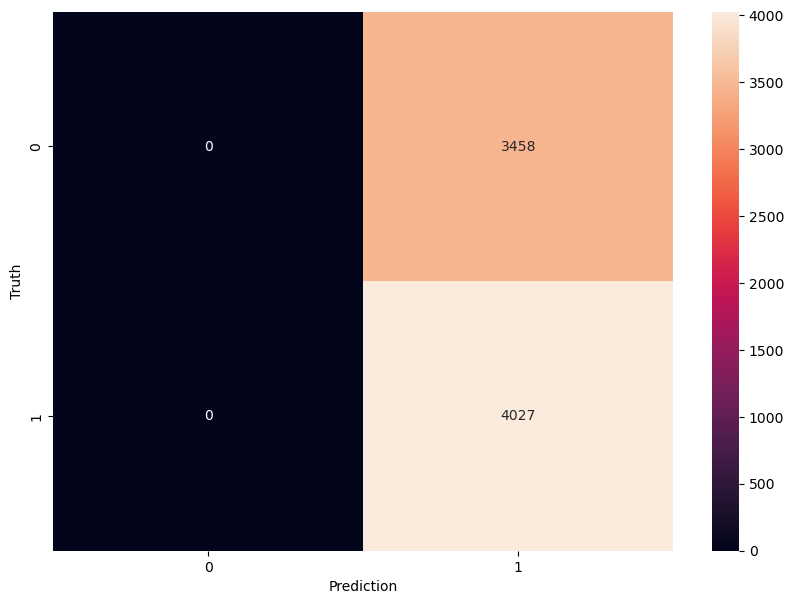

In [173]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, 27), return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(16))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

predResult(X, y, all_feature_cols, model, 30)

In [178]:
from sklearn.preprocessing import MinMaxScaler

X["Year"] = X.index.year

yearGroup = X.groupby("Year")

scaler = MinMaxScaler()

scaled_dfs = []
for year, group in yearGroup:
    group_scaled = pd.DataFrame(scaler.fit_transform(group), columns=group.columns)
    scaled_dfs.append(group_scaled)


# Concatenate the scaled DataFrames
X_scaled = pd.concat(scaled_dfs)

X_scaled = X_scaled.drop("Year", axis=1)

X_scaled.head(5)

,Open,High,Low,Close,Volume,Open Close Ratio,Close Open Ratio,Price Range,Price Change,Daily Returns,...,Trend_5,Close_Ratio_60,Volume_Ratio_60,Trend_60,Close_Ratio_250,Volume_Ratio_250,Trend_250,Close_Ratio_1000,Volume_Ratio_1000,Trend_1000
0,0.788435,0.852334,0.789423,0.873996,0.439375,0.775023,0.865922,0.535445,0.822834,0.773372,...,0.8,0.869223,0.446547,0.500000,1.000000,0.412497,1.000000,1.000000,0.451527,1.0
1,0.874013,0.865506,0.870605,0.861342,0.566156,0.446188,0.865922,0.117596,0.467520,0.445237,...,0.8,0.855657,0.575253,0.428571,0.983757,0.534299,0.941176,0.986669,0.579719,1.0
2,0.861361,0.838724,0.801923,0.819295,0.501927,0.348953,0.865922,0.381984,0.361220,0.348209,...,0.6,0.811603,0.502360,0.357143,0.940287,0.472106,0.882353,0.947790,0.514327,1.0
3,0.819320,0.793502,0.780769,0.772078,0.424543,0.330510,0.865922,0.252711,0.342519,0.329806,...,0.4,0.762679,0.422912,0.357143,0.892232,0.397207,0.882353,0.904472,0.435720,1.0
4,0.772109,0.772574,0.769643,0.793713,0.347369,0.560725,0.865922,0.200999,0.591535,0.559530,...,0.4,0.786692,0.345968,0.428571,0.908449,0.322943,0.882353,0.921053,0.357415,1.0


Epoch 1/30
24/24 [==============================] - 6s 8ms/step - loss: 0.6932 - accuracy: 0.4893
Epoch 2/30
24/24 [==============================] - 0s 7ms/step - loss: 0.6931 - accuracy: 0.5147
Epoch 3/30
24/24 [==============================] - 0s 7ms/step - loss: 0.6934 - accuracy: 0.4653
Epoch 4/30
24/24 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5067
Epoch 5/30
24/24 [==============================] - 0s 8ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 6/30
24/24 [==============================] - 0s 7ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 7/30
24/24 [==============================] - 0s 8ms/step - loss: 0.6932 - accuracy: 0.5173
Epoch 8/30
24/24 [==============================] - 0s 7ms/step - loss: 0.6927 - accuracy: 0.5133
Epoch 9/30
24/24 [==============================] - 0s 7ms/step - loss: 0.6923 - accuracy: 0.5133
Epoch 10/30
24/24 [==============================] - 0s 8ms/step - loss: 0.6924 - accuracy: 0.5133
Epoch 11/30
24/24 [

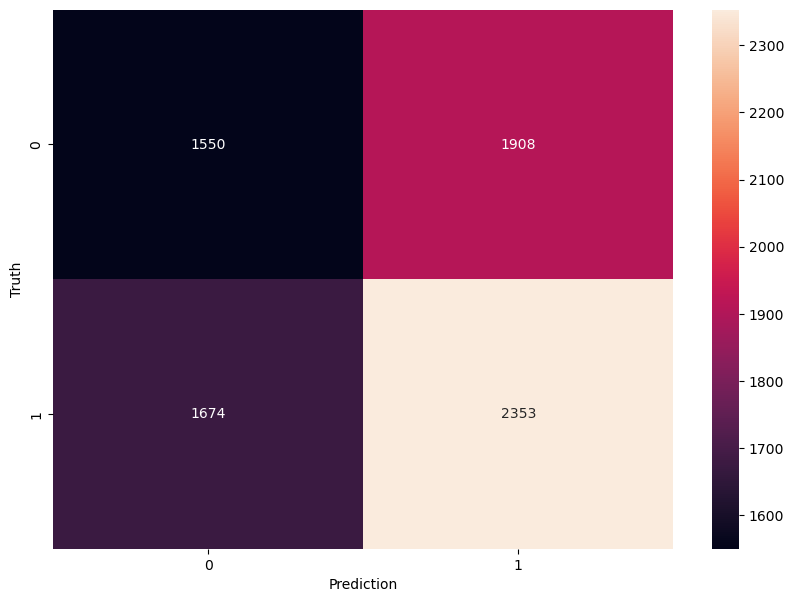

In [181]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, 27), return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(16))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

predResult(X_scaled, y, all_feature_cols, model, 30)

Epoch 1/30
24/24 [==============================] - 26s 22ms/step - loss: 0.6932 - accuracy: 0.5027
Epoch 2/30
24/24 [==============================] - 1s 21ms/step - loss: 0.6931 - accuracy: 0.5133
Epoch 3/30
24/24 [==============================] - 0s 21ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 4/30
24/24 [==============================] - 0s 21ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 5/30
24/24 [==============================] - 0s 20ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 6/30
24/24 [==============================] - 0s 20ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 7/30
24/24 [==============================] - 0s 20ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 8/30
24/24 [==============================] - 1s 21ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 9/30
24/24 [==============================] - 0s 20ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 10/30
24/24 [==============================] - 0s 21ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 11

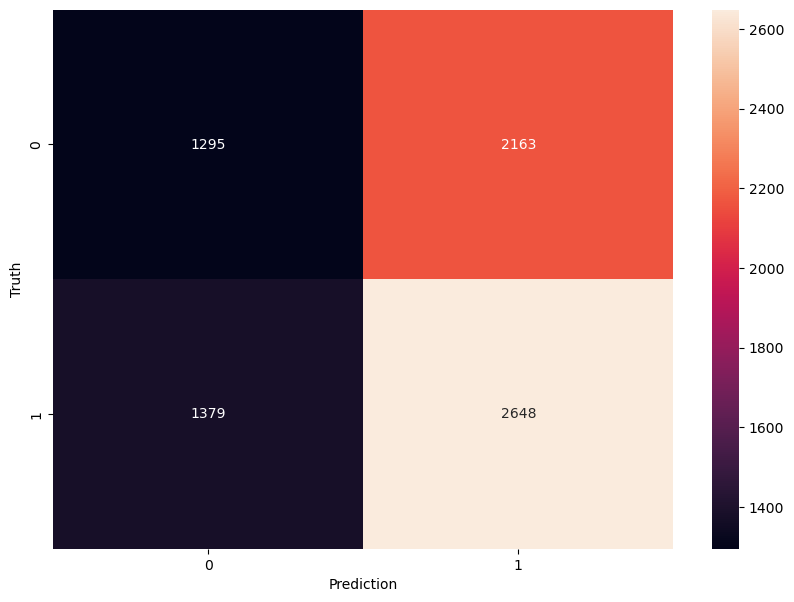

In [187]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, 27), return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(64, input_shape=(1, 27), return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(16))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

predResult(X_scaled, y, all_feature_cols, model, 30)

Epoch 1/30
24/24 [==============================] - 10s 22ms/step - loss: 0.6939 - accuracy: 0.4973
Epoch 2/30
24/24 [==============================] - 1s 22ms/step - loss: 0.6928 - accuracy: 0.5093
Epoch 3/30
24/24 [==============================] - 1s 22ms/step - loss: 0.6925 - accuracy: 0.5267
Epoch 4/30
24/24 [==============================] - 0s 20ms/step - loss: 0.6925 - accuracy: 0.4987
Epoch 5/30
24/24 [==============================] - 0s 20ms/step - loss: 0.6916 - accuracy: 0.5467
Epoch 6/30
24/24 [==============================] - 0s 21ms/step - loss: 0.6908 - accuracy: 0.5347
Epoch 7/30
24/24 [==============================] - 0s 20ms/step - loss: 0.6906 - accuracy: 0.5347
Epoch 8/30
24/24 [==============================] - 0s 20ms/step - loss: 0.6914 - accuracy: 0.5187
Epoch 9/30
24/24 [==============================] - 0s 20ms/step - loss: 0.6888 - accuracy: 0.5440
Epoch 10/30
24/24 [==============================] - 0s 21ms/step - loss: 0.6893 - accuracy: 0.5333
Epoch 11

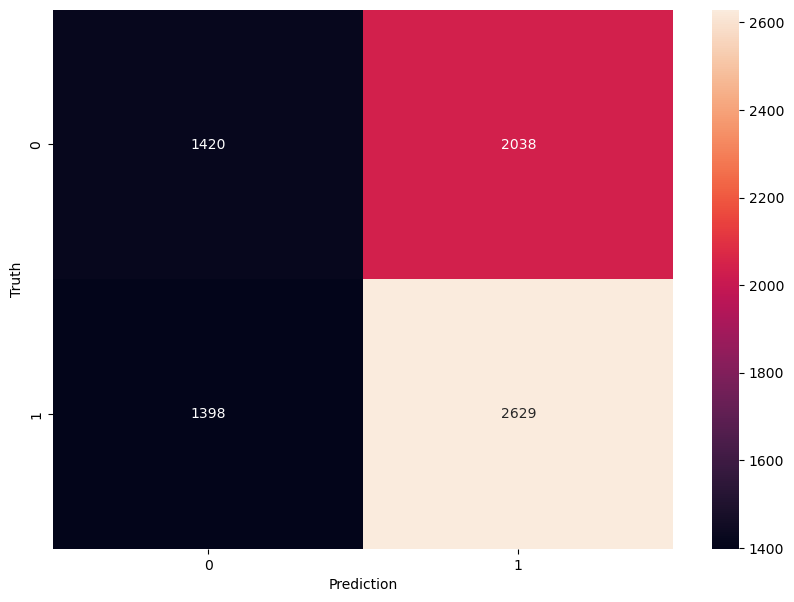

In [188]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, 27), return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(16))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

predResult(X_scaled, y, all_feature_cols, model, 30)

Epoch 1/30
24/24 [==============================] - 16s 32ms/step - loss: 0.6934 - accuracy: 0.4880
Epoch 2/30
24/24 [==============================] - 1s 35ms/step - loss: 0.6931 - accuracy: 0.4960
Epoch 3/30
24/24 [==============================] - 1s 35ms/step - loss: 0.6930 - accuracy: 0.5120
Epoch 4/30
24/24 [==============================] - 1s 35ms/step - loss: 0.6930 - accuracy: 0.5080
Epoch 5/30
24/24 [==============================] - 1s 33ms/step - loss: 0.6929 - accuracy: 0.5160
Epoch 6/30
24/24 [==============================] - 1s 33ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 7/30
24/24 [==============================] - 1s 35ms/step - loss: 0.6929 - accuracy: 0.5120
Epoch 8/30
24/24 [==============================] - 1s 34ms/step - loss: 0.6931 - accuracy: 0.5133
Epoch 9/30
24/24 [==============================] - 1s 35ms/step - loss: 0.6925 - accuracy: 0.5147
Epoch 10/30
24/24 [==============================] - 1s 36ms/step - loss: 0.6925 - accuracy: 0.5067
Epoch 11

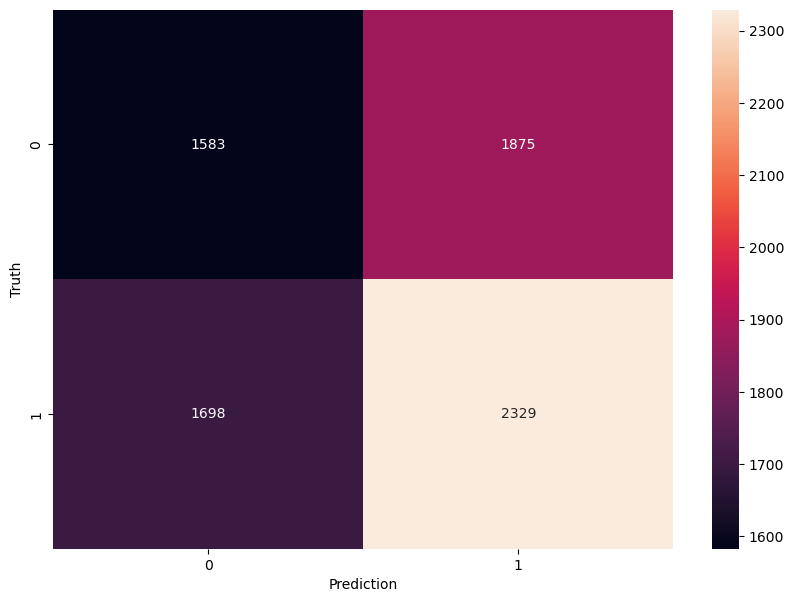

In [189]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, 27), return_sequences=True))
model.add(Dropout(0.3))  # Add dropout with a rate of 0.2
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.3))  # Add dropout with a rate of 0.2
model.add(LSTM(16))
model.add(Dropout(0.3))  # Add dropout with a rate of 0.2
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

predResult(X_scaled, y, all_feature_cols, model, 30)

Epoch 1/30
24/24 [==============================] - 12s 22ms/step - loss: 0.6931 - accuracy: 0.5160
Epoch 2/30
24/24 [==============================] - 1s 23ms/step - loss: 0.6931 - accuracy: 0.5133
Epoch 3/30
24/24 [==============================] - 1s 25ms/step - loss: 0.6931 - accuracy: 0.5133
Epoch 4/30
24/24 [==============================] - 1s 23ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 5/30
24/24 [==============================] - 1s 22ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 6/30
24/24 [==============================] - 1s 23ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 7/30
24/24 [==============================] - 1s 22ms/step - loss: 0.6923 - accuracy: 0.5133
Epoch 8/30
24/24 [==============================] - 1s 23ms/step - loss: 0.6924 - accuracy: 0.5133
Epoch 9/30
24/24 [==============================] - 1s 24ms/step - loss: 0.6923 - accuracy: 0.5133
Epoch 10/30
24/24 [==============================] - 1s 23ms/step - loss: 0.6923 - accuracy: 0.5133
Epoch 11

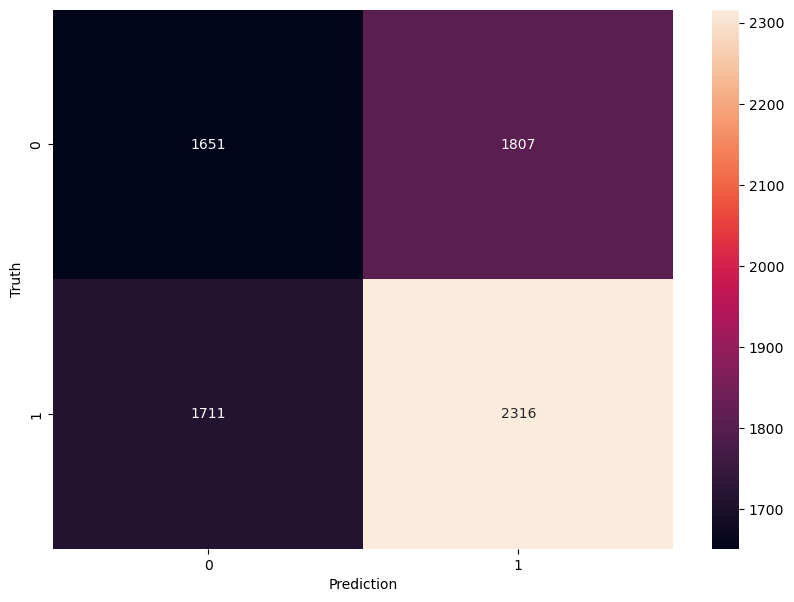

In [190]:
model = Sequential()
model.add(LSTM(64, input_shape=(1, 27), return_sequences=True))
model.add(Dropout(0.4))  # Add dropout with a rate of 0.2
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.4))  # Add dropout with a rate of 0.2
model.add(LSTM(16))
model.add(Dropout(0.4))  # Add dropout with a rate of 0.2
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

predResult(X_scaled, y, all_feature_cols, model, 30)

In [182]:
import xgboost as xgb

dmatrix = xgb.DMatrix(X_scaled, label=y)
params = {
    'objective': 'binary:logistic',  # Use 'reg:linear' for regression or 'binary:logistic' for classification
}
model = xgb.train(params, dmatrix)
importance = model.get_score(importance_type='gain')  # 'gain' or 'weight' or 'cover'
importance_sorted = sorted(importance.items(), key=lambda x: x[1], reverse=True)

for feature, score in importance_sorted:
    print(f"Feature: {feature}, Score: {score}")

Feature: Trend_250, Score: 12.474315643310547
Feature: Close_Ratio_2, Score: 12.049256324768066
Feature: High, Score: 11.258987426757812
Feature: Volume_Ratio_1000, Score: 9.901001930236816
Feature: Low, Score: 9.706275939941406
Feature: Close_Ratio_250, Score: 8.688344955444336
Feature: Trend_1000, Score: 7.575810432434082
Feature: Close, Score: 7.427677154541016
Feature: Trend_60, Score: 7.167404651641846
Feature: Close_Ratio_60, Score: 7.045038223266602
Feature: Close_Ratio_1000, Score: 6.838932991027832
Feature: Open Close Ratio, Score: 6.335092067718506
Feature: Volume Weighted Average Price, Score: 6.227462291717529
Feature: Price Range, Score: 6.098265647888184
Feature: Volume_Ratio_250, Score: 6.016364574432373
Feature: Volume_Ratio_60, Score: 5.766828536987305
Feature: Open, Score: 5.4968342781066895
Feature: Volume, Score: 5.479288101196289
Feature: Close Open Ratio, Score: 5.3470611572265625
Feature: Price Change, Score: 4.7330121994018555
Feature: Daily Returns, Score: 4.68

Epoch 1/30
24/24 [==============================] - 7s 13ms/step - loss: 0.6932 - accuracy: 0.5107
Epoch 2/30
24/24 [==============================] - 0s 13ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 3/30
24/24 [==============================] - 0s 13ms/step - loss: 0.6932 - accuracy: 0.5133
Epoch 4/30
24/24 [==============================] - 0s 14ms/step - loss: 0.6928 - accuracy: 0.5133
Epoch 5/30
24/24 [==============================] - 0s 13ms/step - loss: 0.6927 - accuracy: 0.5133
Epoch 6/30
24/24 [==============================] - 0s 13ms/step - loss: 0.6926 - accuracy: 0.5133
Epoch 7/30
24/24 [==============================] - 0s 12ms/step - loss: 0.6923 - accuracy: 0.5133
Epoch 8/30
24/24 [==============================] - 0s 13ms/step - loss: 0.6922 - accuracy: 0.5133
Epoch 9/30
24/24 [==============================] - 0s 13ms/step - loss: 0.6920 - accuracy: 0.5160
Epoch 10/30
24/24 [==============================] - 0s 14ms/step - loss: 0.6917 - accuracy: 0.5253
Epoch 11/

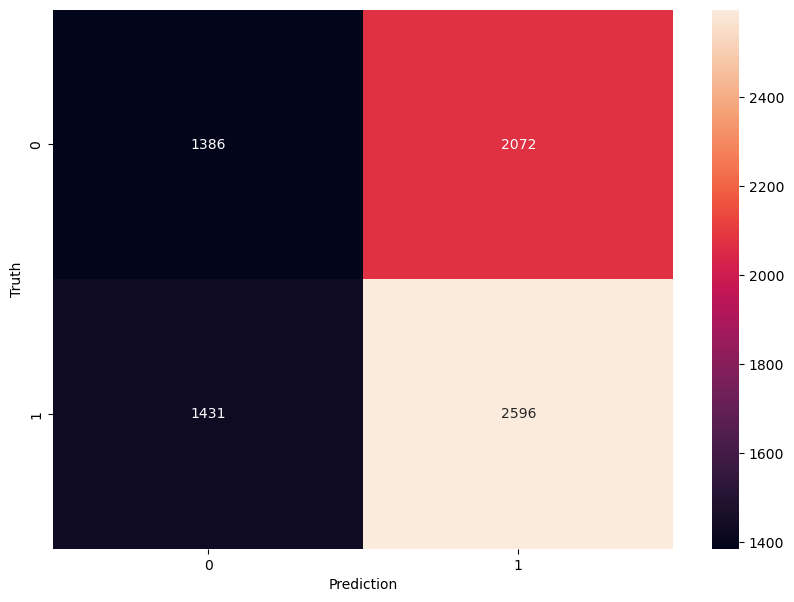

In [183]:
top10_cols = []
for feature, score in importance_sorted[:10]:
    top10_cols.append(feature)

model = Sequential()
model.add(LSTM(64, input_shape=(1, 10), return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(16))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

predResult(X_scaled, y, top10_cols, model, 30)

Epoch 1/30
24/24 [==============================] - 5s 11ms/step - loss: 0.6931 - accuracy: 0.4987
Epoch 2/30
24/24 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 3/30
24/24 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 4/30
24/24 [==============================] - 0s 10ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 5/30
24/24 [==============================] - 0s 10ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 6/30
24/24 [==============================] - 0s 10ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 7/30
24/24 [==============================] - 0s 10ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 8/30
24/24 [==============================] - 0s 10ms/step - loss: 0.6929 - accuracy: 0.5133
Epoch 9/30
24/24 [==============================] - 0s 10ms/step - loss: 0.6928 - accuracy: 0.5133
Epoch 10/30
24/24 [==============================] - 0s 10ms/step - loss: 0.6926 - accuracy: 0.5133
Epoch 11/

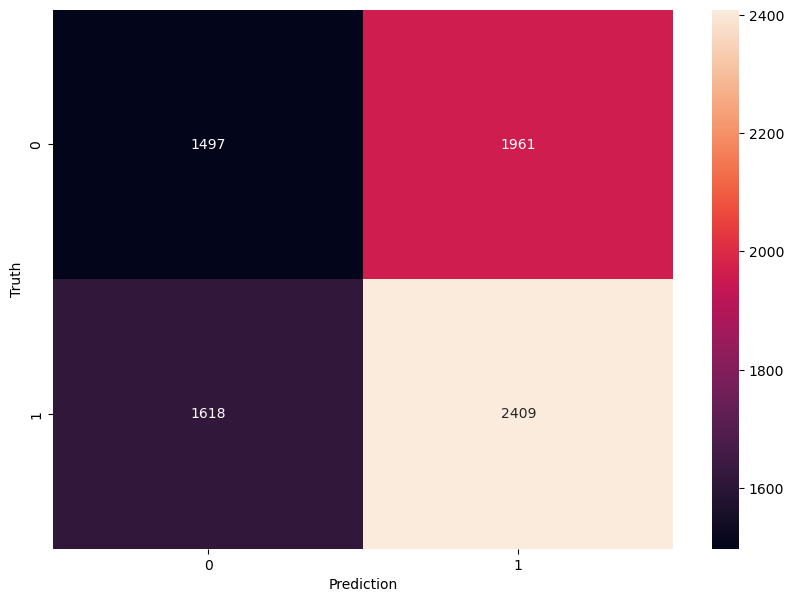

In [184]:
top15_cols = []
for feature, score in importance_sorted[:15]:
    top15_cols.append(feature)

model = Sequential()
model.add(LSTM(64, input_shape=(1, 15), return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(16))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

predResult(X_scaled, y, top15_cols, model, 30)

Epoch 1/30
24/24 [==============================] - 6s 9ms/step - loss: 0.6932 - accuracy: 0.5027
Epoch 2/30
24/24 [==============================] - 0s 9ms/step - loss: 0.6930 - accuracy: 0.5133
Epoch 3/30
24/24 [==============================] - 0s 9ms/step - loss: 0.6928 - accuracy: 0.5133
Epoch 4/30
24/24 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.5133
Epoch 5/30
24/24 [==============================] - 0s 9ms/step - loss: 0.6926 - accuracy: 0.5280
Epoch 6/30
24/24 [==============================] - 0s 9ms/step - loss: 0.6921 - accuracy: 0.5307
Epoch 7/30
24/24 [==============================] - 0s 9ms/step - loss: 0.6918 - accuracy: 0.5253
Epoch 8/30
24/24 [==============================] - 0s 9ms/step - loss: 0.6907 - accuracy: 0.5600
Epoch 9/30
24/24 [==============================] - 0s 9ms/step - loss: 0.6920 - accuracy: 0.5240
Epoch 10/30
24/24 [==============================] - 0s 9ms/step - loss: 0.6907 - accuracy: 0.5173
Epoch 11/30
24/24 [

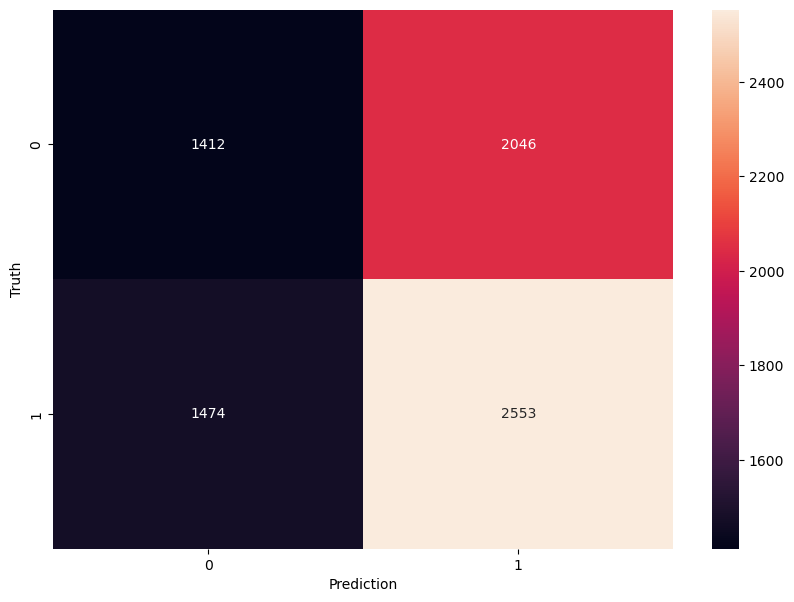

In [185]:
top20_cols = []
for feature, score in importance_sorted[:20]:
    top20_cols.append(feature)

model = Sequential()
model.add(LSTM(64, input_shape=(1, 20), return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(LSTM(16))
model.add(Dropout(0.2))  # Add dropout with a rate of 0.2
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

predResult(X_scaled, y, top20_cols, model, 30)